In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prim
import seaborn as sns
from sklearn import mixture

In [3]:
%matplotlib inline

In [4]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [5]:
data = pd.read_excel("SAMBA scenario results all runs_revised CO2 limit.xlsx","Capital inv variable and fixed")

In [6]:
data.sample(5)

,DMD,FUEL,CC RE,DR,CO2,CC,Parameter (million USD),2013,2014,2015,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
609,2,3,3,1,3,2,AnnualFixedOperatingCost,5937.115644,6229.188218,6670.076121,...,12918.650203,13054.032803,13372.963186,13654.586571,13918.590224,14233.221042,14556.248085,14875.966370,15186.908905,15501.578625
871,3,3,2,1,2,1,AnnualVariableOperatingCost,23736.982014,25076.002274,14612.705089,...,27370.755675,27946.639612,29181.043742,29548.691230,30232.147302,30551.206834,30628.704512,31221.535087,32205.322664,32946.968791
771,3,1,3,1,3,2,AnnualFixedOperatingCost,5937.115644,6229.200589,6670.101500,...,15192.056667,15536.313286,16098.673934,16607.713937,17023.311004,17532.222718,18011.503927,18490.564323,18939.402506,19619.086288
165,1,3,1,1,1,2,AnnualFixedOperatingCost,5937.115644,6229.125508,6669.981817,...,11993.173062,12197.244676,12692.767054,13260.243955,13755.590226,14400.172170,15075.698491,15845.670051,16883.858603,18469.205949
859,3,3,1,3,3,1,AnnualVariableOperatingCost,23746.320138,25087.884017,14621.310651,...,59043.733334,61740.699632,64614.951122,66752.023941,69018.047345,71411.581350,73696.841052,76957.399796,80694.021016,81572.951353


In [7]:
data = data.set_index(['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC', 'Parameter (million USD)'])
data.columns.name = 'year'

In [8]:
data.head(2)

year                                                          2013  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      5937.115644   
                         AnnualVariableOperatingCost  23736.982014   

year                                                          2014  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      6229.125508   
                         AnnualVariableOperatingCost  25166.563181   

year                                                          2015  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      6669.981817   
                         AnnualVariableOperatingCost  14690.847642   

year                                                          2016  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      6981.544297   
                         AnnualVariableOperatingCost  13925.402508   

year                                                          2017  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      7144.275262   
                         AnnualVariableOperatingCost  15083.290133   

year                                                          2018  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      7492.618499   
                         AnnualVariableOperatingCost  15917.372395   

year                                                          2019  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      7600.822183   
                         AnnualVariableOperatingCost  17023.632733   

year                                                          2020  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      8000.109484   
                         AnnualVariableOperatingCost  15533.913198   

year                                                          2021  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      8304.989014   
                         AnnualVariableOperatingCost  14996.139778   

year                                                          2022  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost      8549.425155   
                         AnnualVariableOperatingCost  15012.933518   

year                                                      ...       \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)          ...        
1   1    1     1  1   1  AnnualFixedOperatingCost         ...        
                         AnnualVariableOperatingCost      ...        

year                                                          2041  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost     11979.380309   
                         AnnualVariableOperatingCost  17951.315696   

year                                                          2042  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost     12192.896025   
                         AnnualVariableOperatingCost  17831.787186   

year                                                          2043  \
DMD FUEL CC RE DR CO2 CC Parameter (million USD)                     
1   1    1     1  1   1  AnnualFixedOperatingCost     12688.800543   
                         AnnualVariableOperatingCost  18012.594365   

year                                                          2044

In [9]:
data = data.stack('year')
data.name = 'value'

In [10]:
data.head(2)

DMD  FUEL  CC RE  DR  CO2  CC  Parameter (million USD)   year
1    1     1      1   1    1   AnnualFixedOperatingCost  2013    5937.115644
                                                         2014    6229.125508
Name: value, dtype: float64

In [11]:
data = data.reset_index()
d = 0.06
data["discount_factor"] = (1+d)**(1-(data.year.astype(int)-2012))
data.discount_factor.head(10)

0    1.000000
1    0.943396
2    0.889996
3    0.839619
4    0.792094
5    0.747258
6    0.704961
7    0.665057
8    0.627412
9    0.591898
Name: discount_factor, dtype: float64

In [12]:
data["discounted_value"] = data.value*data.discount_factor
data.head(10)

,DMD,FUEL,CC RE,DR,CO2,CC,Parameter (million USD),year,value,discount_factor,discounted_value
0,1,1,1,1,1,1,AnnualFixedOperatingCost,2013,5937.115644,1.000000,5937.115644
1,1,1,1,1,1,1,AnnualFixedOperatingCost,2014,6229.125508,0.943396,5876.533498
2,1,1,1,1,1,1,AnnualFixedOperatingCost,2015,6669.981817,0.889996,5936.260072
3,1,1,1,1,1,1,AnnualFixedOperatingCost,2016,6981.544297,0.839619,5861.839217
4,1,1,1,1,1,1,AnnualFixedOperatingCost,2017,7144.275262,0.792094,5658.935164
5,1,1,1,1,1,1,AnnualFixedOperatingCost,2018,7492.618499,0.747258,5598.920410
6,1,1,1,1,1,1,AnnualFixedOperatingCost,2019,7600.822183,0.704961,5358.279714
7,1,1,1,1,1,1,AnnualFixedOperatingCost,2020,8000.109484,0.665057,5320.529722
8,1,1,1,1,1,1,AnnualFixedOperatingCost,2021,8304.989014,0.627412,5210.652851
9,1,1,1,1,1,1,AnnualFixedOperatingCost,2022,8549.425155,0.591898,5060.391613


In [13]:
new_data = data.set_index(['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC', 'Parameter (million USD)']).discounted_value.sum(level=['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC', 'Parameter (million USD)']).unstack("Parameter (million USD)").reset_index()

In [14]:
new_data.head(15)

Parameter (million USD),DMD,FUEL,CC RE,DR,CO2,CC,AnnualFixedOperatingCost,AnnualVariableOperatingCost,CapitalInvestment
0,1,1,1,1,1,1,140132.501609,265573.679013,553130.009359
1,1,1,1,1,1,2,140132.501609,265573.679013,553130.009359
2,1,1,1,1,2,1,136950.740836,268463.184119,507686.341384
3,1,1,1,1,2,2,136938.335930,268034.979319,508221.572493
4,1,1,1,1,3,1,137194.796730,269136.897516,505235.136490
5,1,1,1,1,3,2,137120.395695,268674.061365,505765.265584
6,1,1,1,2,1,1,135471.905267,291188.398482,580234.646659
7,1,1,1,2,1,2,135471.905267,291188.398482,580234.646659
8,1,1,1,2,2,1,130259.469168,305299.735148,510378.072923
9,1,1,1,2,2,2,130053.870567,304220.952584,512049.004149


### separate uncertain factors from results

In [15]:
inputs = new_data[['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC']]

### results (costs)

In [16]:
new_data[['CapitalInvestment','AnnualFixedOperatingCost','AnnualVariableOperatingCost']].describe()

Parameter (million USD),CapitalInvestment,AnnualFixedOperatingCost,AnnualVariableOperatingCost
count,3.240000e+02,324.000000,324.000000
mean,6.540085e+05,140250.300676,343650.695148
std,1.463792e+05,8435.880516,61490.805437
min,4.593265e+05,123993.336826,265573.679013
25%,5.456507e+05,133773.394219,299689.070437
50%,6.153911e+05,139659.728606,324868.136535
75%,7.233889e+05,144708.575480,371229.781523
max,1.184594e+06,162493.071318,534280.521865


In [17]:
new_data['tot_cost'] = new_data[['CapitalInvestment','AnnualFixedOperatingCost','AnnualVariableOperatingCost']].sum(axis=1)

In [18]:
new_data['tot_cost'].describe()

count    3.240000e+02
mean     1.137909e+06
std      1.631190e+05
min      9.115597e+05
25%      1.012962e+06
50%      1.117834e+06
75%      1.234070e+06
max      1.702259e+06
Name: tot_cost, dtype: float64

In [19]:
new_data['annual_cost'] = new_data[['AnnualFixedOperatingCost','AnnualVariableOperatingCost']].sum(axis=1)

### clustering and scenario discovery functions 

In [20]:
def normalize(data):
    minima = np.min(data, axis=0)
    maxima = np.max(data, axis=0)
    a = 1/(maxima-minima)
    b = minima/(minima-maxima)
    data = a * data + b                    
    return data

def clustering(n_clusters,data,xstring,ystring):
    data_norm = normalize(data)
    g = mixture.GaussianMixture(n_components=n_clusters)
    #g = mixture.GaussianMixture(n_components=n_clusters,random_state = 0)
    g.fit(data_norm)
    pred = g.predict(data_norm)+1
                    
    x=[]
    y=[]
    for i in range(0,len(data)):
        x.append(data[i][0])
        y.append(data[i][1])

    df = pd.DataFrame()
    df[xstring] = x
    df[ystring] = y
    df['class'] = pred
    
    return df

In [21]:
def get_prim(n_clusters, f_value,data,xstring,ystring,inputs):
    
    df = clustering(n_clusters,data,xstring,ystring)
    list_prim =[]
        
    for i in range(1,df['class'].max()+1):
        list_prim.append(prim.Prim(inputs, (df['class']==i),threshold=0.5,threshold_type=">"))

    boxes = []

    for i in range(0,len(list_prim)):
        boxes.append(list_prim[i].find_box())
        obj = (f_value*boxes[i].peeling_trajectory['coverage']-(1-f_value)*boxes[i].peeling_trajectory['density'])**2
        if 1 in boxes[i].peeling_trajectory['coverage']:
            coverage1 = np.where(boxes[i].peeling_trajectory['coverage']==1)[0][0]
            obj = obj.drop(obj.index[[coverage1]])
        k = obj.argmin()
        boxes[i].select(k)
    
    return [boxes,df]

### looking for the clusters that gives the best PRIM results (the number of clusters is chosen by the algorithm) 

In [22]:
oois = ['annual_cost','CapitalInvestment']

data = np.array([[new_data[oois[0]][0],new_data[oois[1]][0]]])
for i in range(1,len(new_data.index)):
    data = np.concatenate((data,np.array([[new_data[oois[0]][i],new_data[oois[1]][i]]])))

In [23]:
n_clusters = 4
f_value = 0.5
seuil = 1.2

In [24]:
boxes_out,df_out = get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs)

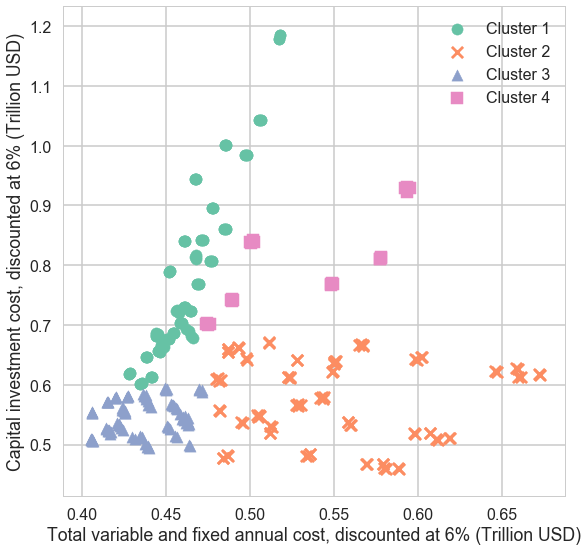

In [25]:
f = plt.figure(figsize=(9,9))
mycolors = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3"]
mymarks = ["o","x","^","s"]
for (i,subdf) in df_out.groupby("class"):
    plt.scatter(1e-6*subdf.annual_cost,1e-6*subdf.CapitalInvestment,label="Cluster {}".format(i),c=mycolors[i-1],marker=mymarks[i-1])
    
plt.legend()
plt.xlabel("Total variable and fixed annual cost, discounted at 6% (Trillion USD)")
plt.ylabel("Capital investment cost, discounted at 6% (Trillion USD)")
plt.savefig("clusters_discounted_6.png")

### below are PRIM results for each cluster

#### cluster 1  

In [26]:
boxes_out[0].limits

,min,max,qp values
CO2,1.0,1.0,2.282230e-27


In [27]:
boxes_out[0].coverage,boxes_out[0].density

(0.8214285714285714, 0.85185185185185186)

#### cluster 2 

In [28]:
boxes_out[1].limits

,min,max,qp values
DR,3.0,3.0,1.322730e-12
CO2,2.0,3.0,5.785913e-07


In [29]:
boxes_out[1].coverage,boxes_out[1].density

(0.65217391304347827, 0.83333333333333337)

#### cluster 3 

In [30]:
boxes_out[2].limits

,min,max,qp values
DMD,1.0,2.0,7.660167e-09
DR,1.0,2.0,7.660167e-09
CO2,2.0,3.0,2.024737e-04


In [31]:
boxes_out[2].coverage,boxes_out[2].density

(0.83333333333333337, 0.83333333333333337)

In [32]:
boxes_out[3].limits

,min,max,qp values
DMD,3.0,3.0,3.540706e-12
CO2,2.0,2.0,3.540706e-12
DR,2.0,3.0,5.940319e-05


In [37]:
boxes_out[3].coverage,boxes_out[3].density

(1.0, 1.0)